In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import joblib


In [3]:
# Load the dataset from the uploaded CSV file
df = pd.read_csv('heart_disease_data.csv')

# Display the first few rows of the dataset
df.head()

# Check for any missing values
df.isnull().sum()

# Check dataset info for data types and structure
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [4]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Features (all columns except 'target')
y = df['target']  # Target variable ('target')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (for models like SVC, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [10]:
# Initialize the models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVC': SVC(probability=True),  # Set probability=True for ROC curve
    'KNeighbors': KNeighborsClassifier()
}

# Fit models and save results
model_results = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store model results
    model_results[model_name] = {
        'model': model,
        'accuracy': accuracy,
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'y_pred': y_pred,
        'roc_curve': roc_curve(y_test, model.predict_proba(X_test)[:,1])
    }

    # Save the trained model
    joblib.dump(model, f'{model_name.lower().replace(" ", "_")}_model.pkl')

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

Model: Random Forest
Accuracy: 0.9854


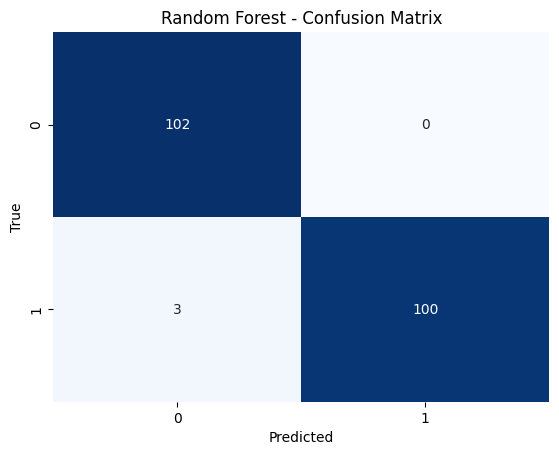

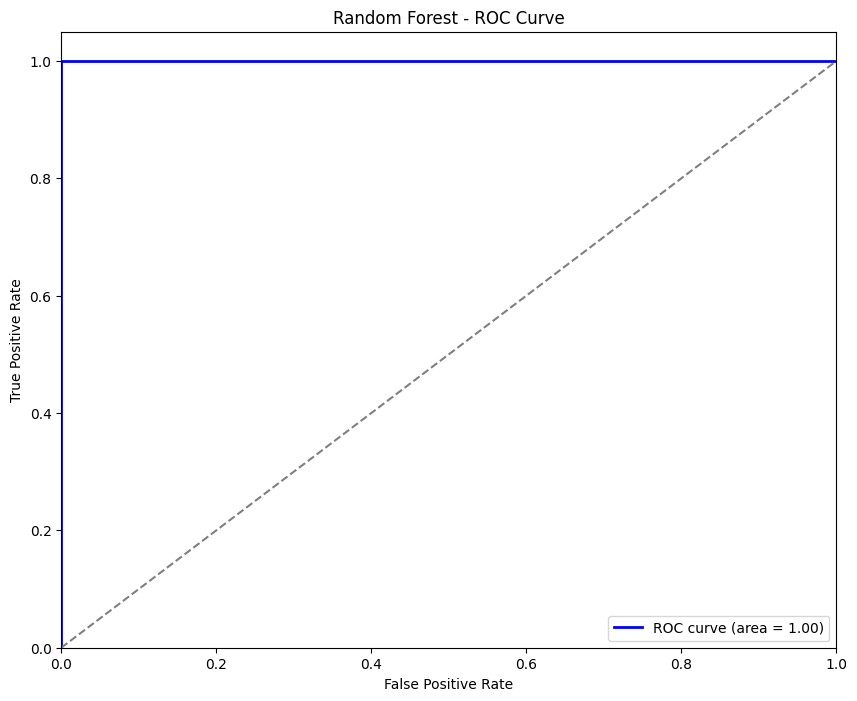

Model: Logistic Regression
Accuracy: 0.7951


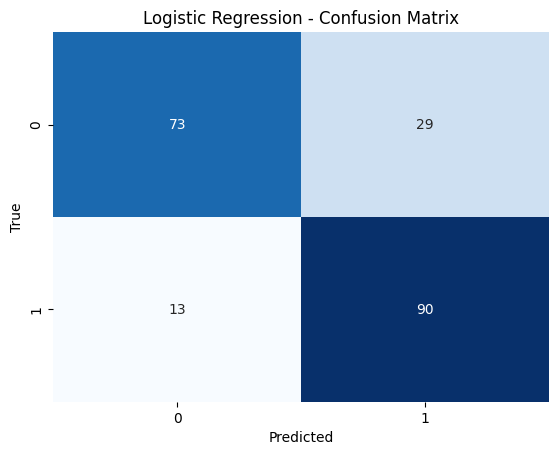

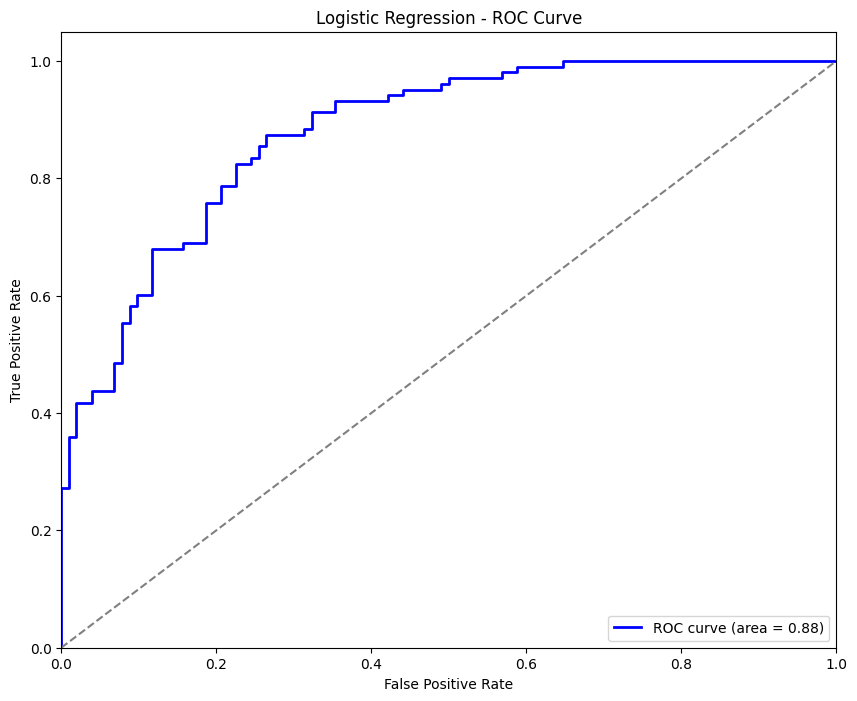

Model: Decision Tree
Accuracy: 0.9854


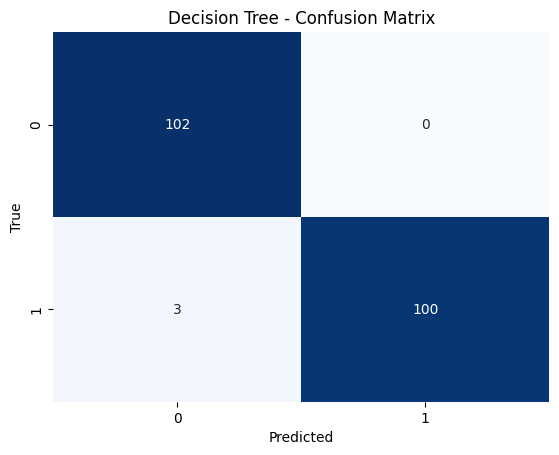

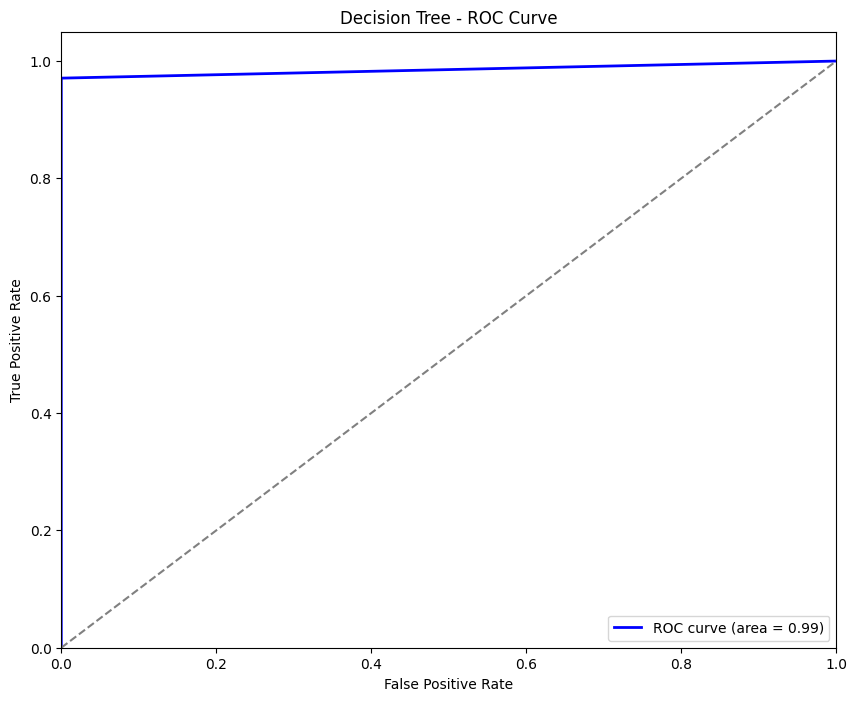

Model: SVC
Accuracy: 0.8878


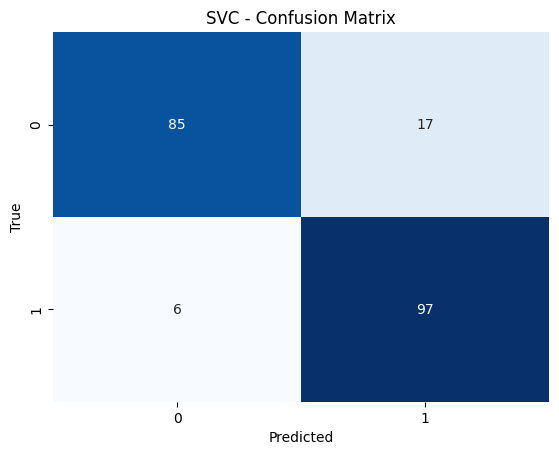

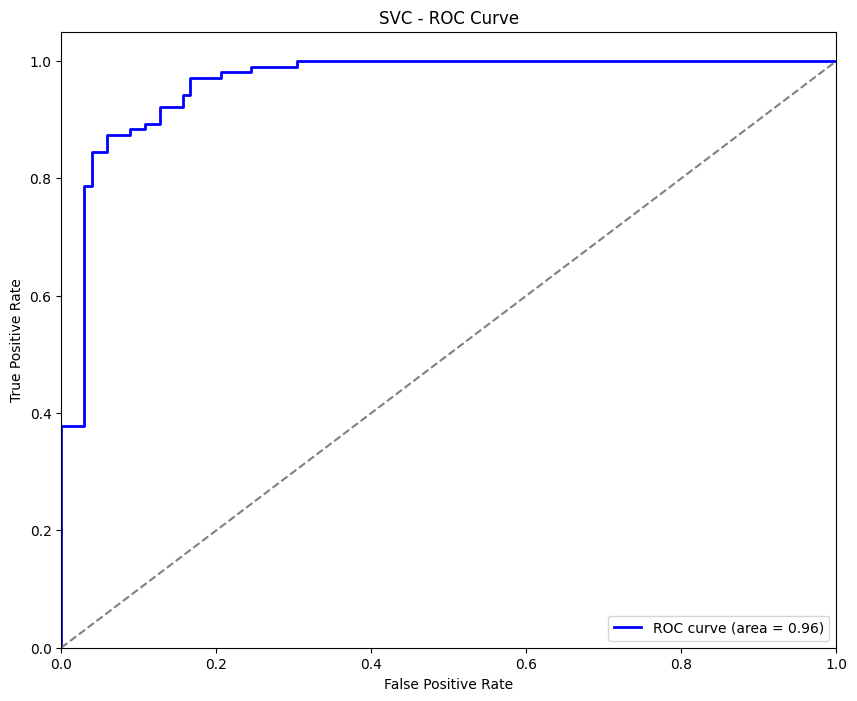

Model: KNeighbors
Accuracy: 0.8341


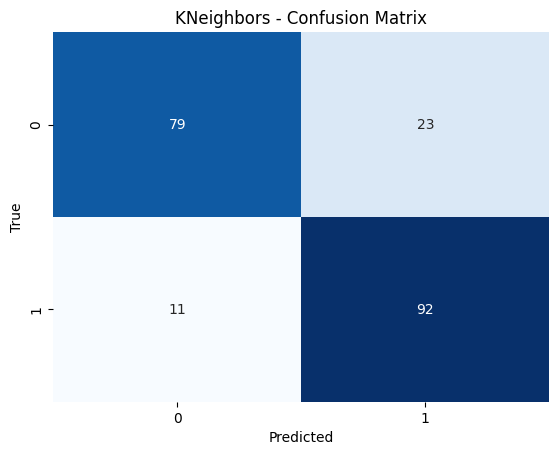

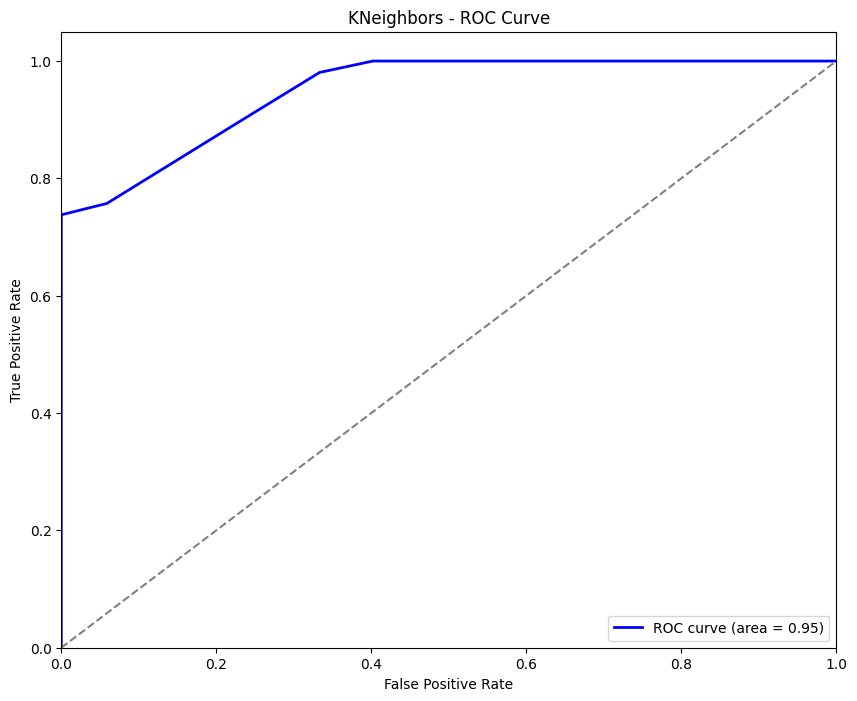

In [6]:
# Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.figure(figsize=(10, 8))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.title(f'{model_name} - ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Display the results for all models
for model_name, results in model_results.items():
    cm = results['confusion_matrix']
    fpr, tpr, _ = results['roc_curve']
    roc_auc = auc(fpr, tpr)
    
    print(f"Model: {model_name}")
    print(f"Accuracy: {results['accuracy']:.4f}")
    
    # Plot confusion matrix
    plot_confusion_matrix(cm, model_name)
    
    # Plot ROC curve
    plot_roc_curve(fpr, tpr, roc_auc, model_name)


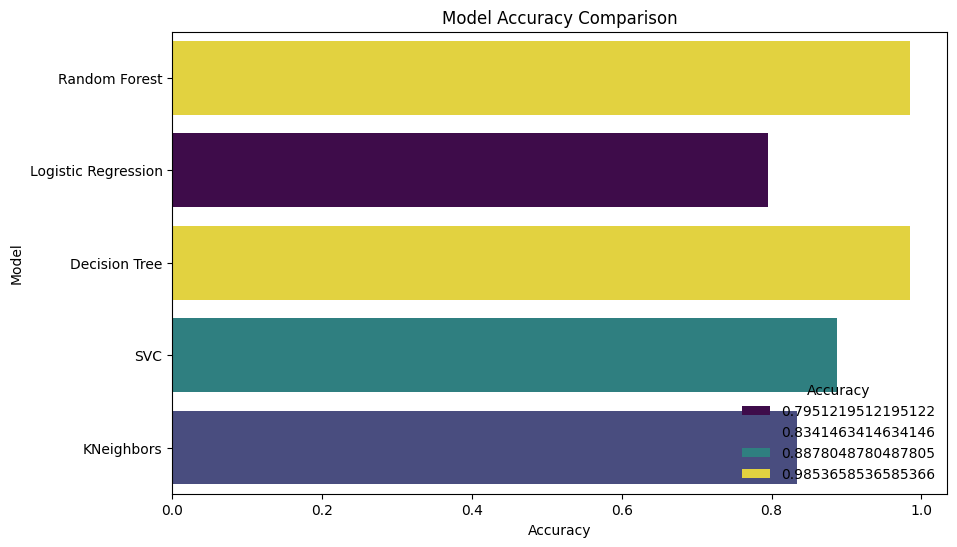

In [8]:
# Create a bar plot to compare accuracies of all models
accuracy_df = pd.DataFrame({
    'Model': model_results.keys(),
    'Accuracy': [results['accuracy'] for results in model_results.values()]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Accuracy', y='Model', data=accuracy_df, palette='viridis', hue='Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.legend(title="Accuracy", loc="lower right", frameon=False)
plt.show()


In [9]:
# Save the model that performs best (Random Forest in this case)
best_model = model_results['Random Forest']['model']
joblib.dump(best_model, 'best_heart_disease_model.pkl')


['best_heart_disease_model.pkl']